# Handwritten Digits Image Classification

I'm using [*MNIST Handwritten Digits Database*](http://yann.lecun.com/exdb/mnist/) as the dataset to classify handwritten digits 0 to 9 from images of handwritten digits of size 28px by 28px.

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

The dataset has 60000 images that we'll use to train the model. There is also an additional test set of 10000 images.

In [2]:
dataset = MNIST(root='data/', download=True)

C:\Users\Ann Gie\AppData\Roaming\Python\Python38\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


This is our training set of 60000 images.

In [3]:
len(dataset)

60000

This is our test set of 10000 images.

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x14557C4CBE0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


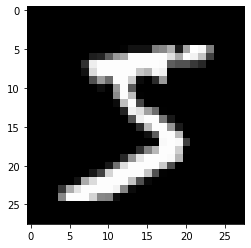

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


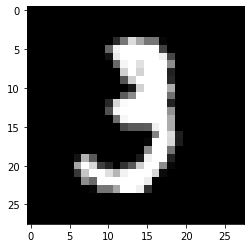

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

Transforming the images into tensors to work with PyTorch.

In [9]:
import torchvision.transforms as transforms
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to a 1x28x28 tensor.
Let's look at some sample values inside the tensor.

In [11]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with 0 representing black, 1 white, and the values in between different shades of grey.

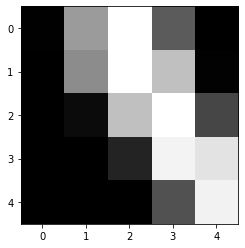

In [12]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

## Spliting data into Training and Validation data

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

Create data loaders to help load the data in batches.

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

We will use `nn.Linear` to create our model.

Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

The output for each image is a vector of size 10, with each element signifying the probability of a particular target label. The predicted label for an image is simply the one with the highest probability.

In [15]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

There are 28*28 = 784 features (one for each pixel) and 10 output features (10 classes). Let's take a look at the weights and biases in our model.

In [16]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0062,  0.0328, -0.0063,  ..., -0.0023,  0.0012,  0.0171],
        [ 0.0293,  0.0084, -0.0017,  ..., -0.0215,  0.0236, -0.0088],
        [-0.0262,  0.0057,  0.0292,  ..., -0.0085, -0.0294,  0.0274],
        ...,
        [-0.0304,  0.0291,  0.0204,  ..., -0.0189, -0.0330,  0.0067],
        [ 0.0166, -0.0136,  0.0340,  ...,  0.0196,  0.0306,  0.0311],
        [-0.0309,  0.0084, -0.0300,  ..., -0.0158,  0.0056,  0.0249]],
       requires_grad=True)

In [17]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0302,  0.0129,  0.0252, -0.0020, -0.0305, -0.0229, -0.0107, -0.0186,
         0.0257, -0.0093], requires_grad=True)

In [18]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

In [19]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [20]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 3.8302e-04,  3.4177e-02,  2.5776e-02,  ...,  1.5119e-02,
           2.0110e-02, -1.9037e-02],
         [-2.9659e-02,  1.4007e-03,  6.2521e-03,  ..., -3.0359e-02,
           9.4811e-04, -9.7537e-03],
         [-2.7187e-02, -1.6953e-02, -2.2753e-02,  ...,  1.3507e-02,
           7.2713e-03,  1.7291e-02],
         ...,
         [-3.3118e-02, -1.0104e-02,  2.7370e-03,  ...,  2.8929e-02,
           1.0129e-02, -7.1404e-03],
         [ 1.9532e-02, -2.6044e-05, -1.3816e-02,  ..., -6.3033e-03,
           2.4569e-02,  1.9429e-02],
         [ 2.4606e-02, -8.0568e-03, -2.2457e-02,  ...,  3.2899e-02,
          -1.2143e-02, -3.0197e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0088, -0.0317,  0.0119, -0.0182,  0.0093,  0.0313, -0.0267,  0.0282,
          0.0045,  0.0320], requires_grad=True)]

In [21]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0937,  0.0321, -0.3720, -0.2981, -0.1115,  0.1236, -0.0298,  0.1846,
          0.0641,  0.0744],
        [-0.1538, -0.0086, -0.2074, -0.2035, -0.2019, -0.0376, -0.2911,  0.2612,
          0.3517,  0.2965]])


In [22]:
import torch.nn.functional as F

In [23]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0937, 0.1063, 0.0709, 0.0764, 0.0920, 0.1164, 0.0999, 0.1238, 0.1097,
         0.1109],
        [0.0851, 0.0985, 0.0807, 0.0810, 0.0811, 0.0956, 0.0742, 0.1289, 0.1411,
         0.1336]])
Sum:  1.0


The softmax function is included in the `torch.nn.functional` package and requires us to specify a dimension along which the function should be applied.

In [24]:
outputs[:2]

tensor([[-0.0937,  0.0321, -0.3720, -0.2981, -0.1115,  0.1236, -0.0298,  0.1846,
          0.0641,  0.0744],
        [-0.1538, -0.0086, -0.2074, -0.2035, -0.2019, -0.0376, -0.2911,  0.2612,
          0.3517,  0.2965]], grad_fn=<SliceBackward>)

Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using torch.max, which returns each row's largest element and the corresponding index.

In [25]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([7, 8, 9, 9, 5, 8, 5, 5, 5, 5, 1, 9, 5, 5, 8, 5, 5, 5, 1, 8, 7, 7, 5, 5,
        1, 5, 9, 5, 5, 9, 7, 5, 9, 8, 9, 9, 5, 7, 5, 5, 5, 8, 5, 5, 8, 8, 5, 5,
        5, 8, 5, 2, 9, 9, 5, 5, 8, 9, 5, 8, 5, 5, 5, 8, 5, 7, 8, 8, 5, 5, 5, 5,
        5, 9, 5, 7, 5, 5, 7, 5, 6, 9, 9, 9, 5, 7, 6, 5, 1, 5, 9, 9, 5, 5, 8, 1,
        9, 5, 8, 6, 8, 5, 5, 5, 5, 8, 5, 5, 5, 8, 5, 5, 5, 8, 9, 5, 5, 8, 5, 5,
        8, 9, 5, 8, 9, 5, 9, 7])
tensor([0.1238, 0.1411, 0.1240, 0.1337, 0.1309, 0.1400, 0.1234, 0.1382, 0.1299,
        0.1339, 0.1138, 0.1338, 0.1322, 0.1567, 0.1344, 0.1361, 0.1202, 0.1397,
        0.1421, 0.1679, 0.1177, 0.1247, 0.1157, 0.1666, 0.1213, 0.1752, 0.1358,
        0.1397, 0.1539, 0.1232, 0.1393, 0.1326, 0.1414, 0.1335, 0.1459, 0.1422,
        0.1260, 0.1919, 0.1245, 0.1644, 0.1461, 0.1530, 0.1191, 0.1368, 0.1353,
        0.1318, 0.1315, 0.1363, 0.1541, 0.1588, 0.1214, 0.1206, 0.1418, 0.1485,
        0.1424, 0.1381, 0.1335, 0.1407, 0.1947, 0.1614, 0.1273, 0.1292, 0.1236,
       

In [26]:
labels

tensor([8, 0, 5, 9, 9, 6, 9, 1, 1, 3, 5, 4, 8, 3, 2, 5, 1, 1, 2, 4, 6, 5, 6, 7,
        1, 3, 8, 1, 2, 9, 8, 4, 8, 9, 8, 9, 1, 0, 9, 3, 7, 0, 6, 2, 4, 6, 9, 3,
        9, 0, 9, 6, 5, 5, 3, 8, 9, 0, 3, 0, 2, 8, 1, 4, 3, 0, 4, 0, 3, 3, 3, 4,
        3, 2, 1, 0, 1, 5, 3, 1, 2, 2, 0, 2, 2, 1, 2, 6, 6, 7, 7, 6, 6, 1, 9, 1,
        8, 3, 8, 4, 4, 9, 6, 9, 1, 3, 5, 1, 6, 9, 2, 9, 3, 5, 9, 7, 1, 0, 7, 1,
        7, 0, 9, 6, 4, 2, 7, 8])

Most of the predicted labels for the first batch of training images differ from the actul . We will be using gradient descent to make better predictions.

## Evaluation Metric and Loss Function

In [27]:
outputs[:2]

tensor([[-0.0937,  0.0321, -0.3720, -0.2981, -0.1115,  0.1236, -0.0298,  0.1846,
          0.0641,  0.0744],
        [-0.1538, -0.0086, -0.2074, -0.2035, -0.2019, -0.0376, -0.2911,  0.2612,
          0.3517,  0.2965]], grad_fn=<SliceBackward>)

In [28]:
torch.sum(preds == labels)

tensor(10)

In [29]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [30]:
accuracy(outputs, labels)

tensor(0.0781)

In [31]:
probs

tensor([[0.0937, 0.1063, 0.0709,  ..., 0.1238, 0.1097, 0.1109],
        [0.0851, 0.0985, 0.0807,  ..., 0.1289, 0.1411, 0.1336],
        [0.1059, 0.0921, 0.0838,  ..., 0.0983, 0.0799, 0.1240],
        ...,
        [0.0686, 0.0748, 0.0731,  ..., 0.1210, 0.1270, 0.0963],
        [0.0940, 0.1038, 0.0656,  ..., 0.0978, 0.1129, 0.1215],
        [0.0958, 0.1174, 0.0601,  ..., 0.1472, 0.1124, 0.1124]],
       grad_fn=<SoftmaxBackward>)

In [32]:
outputs

tensor([[-0.0937,  0.0321, -0.3720,  ...,  0.1846,  0.0641,  0.0744],
        [-0.1538, -0.0086, -0.2074,  ...,  0.2612,  0.3517,  0.2965],
        [ 0.0463, -0.0928, -0.1881,  ..., -0.0283, -0.2350,  0.2042],
        ...,
        [-0.3265, -0.2403, -0.2633,  ...,  0.2410,  0.2895,  0.0123],
        [-0.0593,  0.0398, -0.4200,  ..., -0.0200,  0.1231,  0.1970],
        [-0.0094,  0.1944, -0.4748,  ...,  0.4205,  0.1505,  0.1510]],
       grad_fn=<AddmmBackward>)

In [33]:
loss_fn = F.cross_entropy

In [34]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3699, grad_fn=<NllLossBackward>)


## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model.

In [35]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [36]:
l1 = [1, 2, 3, 4, 5]

In [37]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [38]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [39]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [40]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3553197383880615, 'val_acc': 0.08425632864236832}

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).
We are now ready to train the model. Let's train for five epochs and look at the results.

In [41]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9801, val_acc: 0.5385
Epoch [1], val_loss: 1.7065, val_acc: 0.7133
Epoch [2], val_loss: 1.5015, val_acc: 0.7541
Epoch [3], val_loss: 1.3463, val_acc: 0.7734
Epoch [4], val_loss: 1.2269, val_acc: 0.7882


In [42]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1330, val_acc: 0.7978
Epoch [1], val_loss: 1.0577, val_acc: 0.8067
Epoch [2], val_loss: 0.9963, val_acc: 0.8130
Epoch [3], val_loss: 0.9451, val_acc: 0.8187
Epoch [4], val_loss: 0.9018, val_acc: 0.8247


In [43]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8649, val_acc: 0.8285
Epoch [1], val_loss: 0.8328, val_acc: 0.8327
Epoch [2], val_loss: 0.8046, val_acc: 0.8354
Epoch [3], val_loss: 0.7798, val_acc: 0.8385
Epoch [4], val_loss: 0.7577, val_acc: 0.8409


In [44]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7380, val_acc: 0.8439
Epoch [1], val_loss: 0.7201, val_acc: 0.8460
Epoch [2], val_loss: 0.7039, val_acc: 0.8484
Epoch [3], val_loss: 0.6891, val_acc: 0.8497
Epoch [4], val_loss: 0.6755, val_acc: 0.8515


While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

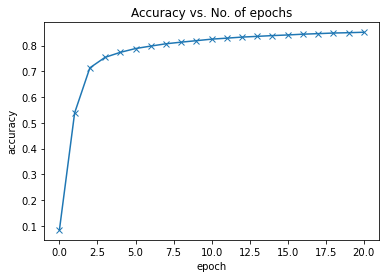

In [45]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

The overall accuracy of doesn't look like it's improving a lot so far, we will look at the model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [46]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Here's a sample image from the dataset.

Shape: torch.Size([1, 28, 28])
Label: 7


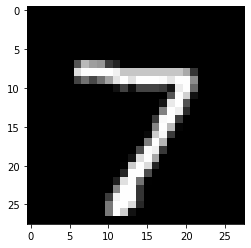

In [47]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [48]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


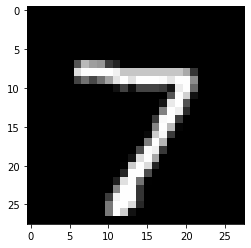

In [49]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


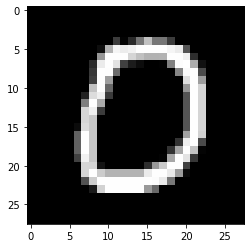

In [50]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


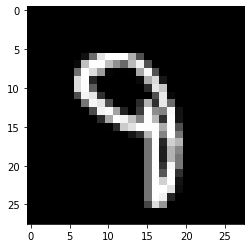

In [51]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


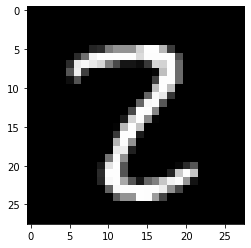

In [52]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [53]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6433819532394409, 'val_acc': 0.8623046875}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

## Saving and loading the model

In [54]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [55]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0086, -0.0039, -0.0217,  ...,  0.0178, -0.0298,  0.0170],
                      [ 0.0018,  0.0041,  0.0252,  ..., -0.0201,  0.0040,  0.0105],
                      [ 0.0267,  0.0189, -0.0341,  ...,  0.0066,  0.0099, -0.0105],
                      ...,
                      [-0.0128, -0.0301,  0.0227,  ...,  0.0294,  0.0061,  0.0118],
                      [-0.0311,  0.0255, -0.0304,  ..., -0.0248,  0.0157,  0.0177],
                      [ 0.0067, -0.0196, -0.0120,  ...,  0.0155, -0.0166,  0.0173]])),
             ('linear.bias',
              tensor([-0.0328,  0.0720, -0.0018, -0.0072,  0.0055,  0.0419, -0.0135,  0.0597,
                      -0.0905, -0.0249]))])

In [56]:
model2 = MnistModel()

In [57]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0050, -0.0242,  0.0204,  ...,  0.0307,  0.0224, -0.0239],
                      [ 0.0263, -0.0129, -0.0217,  ..., -0.0211, -0.0229, -0.0317],
                      [-0.0181,  0.0322, -0.0333,  ...,  0.0146,  0.0055, -0.0007],
                      ...,
                      [-0.0239, -0.0059,  0.0235,  ..., -0.0020,  0.0336,  0.0105],
                      [ 0.0164, -0.0215,  0.0224,  ..., -0.0100, -0.0147,  0.0283],
                      [-0.0050, -0.0021,  0.0091,  ...,  0.0275, -0.0286,  0.0169]])),
             ('linear.bias',
              tensor([-0.0118,  0.0296,  0.0039, -0.0265,  0.0055,  0.0118, -0.0164,  0.0239,
                       0.0193, -0.0096]))])

In [58]:
evaluate(model2, test_loader)

{'val_loss': 2.31054425239563, 'val_acc': 0.13105468451976776}

In [59]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0086, -0.0039, -0.0217,  ...,  0.0178, -0.0298,  0.0170],
                      [ 0.0018,  0.0041,  0.0252,  ..., -0.0201,  0.0040,  0.0105],
                      [ 0.0267,  0.0189, -0.0341,  ...,  0.0066,  0.0099, -0.0105],
                      ...,
                      [-0.0128, -0.0301,  0.0227,  ...,  0.0294,  0.0061,  0.0118],
                      [-0.0311,  0.0255, -0.0304,  ..., -0.0248,  0.0157,  0.0177],
                      [ 0.0067, -0.0196, -0.0120,  ...,  0.0155, -0.0166,  0.0173]])),
             ('linear.bias',
              tensor([-0.0328,  0.0720, -0.0018, -0.0072,  0.0055,  0.0419, -0.0135,  0.0597,
                      -0.0905, -0.0249]))])

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [60]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6433819532394409, 'val_acc': 0.8623046875}